<a href="https://colab.research.google.com/github/ADeogratias/book_recommender_model_deployment/blob/main/Deogratias_Amani_books_recommender_system_optimized_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow.keras as tf

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
! ls "/content/gdrive/My Drive/rec_sys_goodbooks-10k"

books.csv  book_tags.csv  ratings.csv  tags.csv  to_read.csv


In [5]:
ratings_df = pd.read_csv("/content/gdrive/My Drive/rec_sys_goodbooks-10k/ratings.csv")
books_df = pd.read_csv("/content/gdrive/My Drive/rec_sys_goodbooks-10k/books.csv")

In [6]:
ratings_df.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [7]:
books_df.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [8]:
print(ratings_df.shape)
print(ratings_df.user_id.nunique())
print(ratings_df.book_id.nunique())
ratings_df.isna().sum()

(5976479, 3)
53424
10000


user_id    0
book_id    0
rating     0
dtype: int64

In [9]:
ratings_df.describe()

,user_id,book_id,rating
count,5.976479e+06,5.976479e+06,5.976479e+06
mean,2.622446e+04,2.006477e+03,3.919866e+00
std,1.541323e+04,2.468499e+03,9.910868e-01
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.281300e+04,1.980000e+02,3.000000e+00
50%,2.593800e+04,8.850000e+02,4.000000e+00
75%,3.950900e+04,2.973000e+03,5.000000e+00
max,5.342400e+04,1.000000e+04,5.000000e+00


In [10]:
books_df.describe()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn13,original_publication_year,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
count,10000.00000,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,9.415000e+03,9979.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04
mean,5000.50000,5.264697e+06,5.471214e+06,8.646183e+06,75.712700,9.755044e+12,1981.987674,4.002191,5.400124e+04,5.968732e+04,2919.955300,1345.040600,3110.885000,11475.893800,1.996570e+04,2.378981e+04
std,2886.89568,7.575462e+06,7.827330e+06,1.175106e+07,170.470728,4.428619e+11,152.576665,0.254427,1.573700e+05,1.678038e+05,6124.378132,6635.626263,9717.123578,28546.449183,5.144736e+04,7.976889e+04
min,1.00000,1.000000e+00,1.000000e+00,8.700000e+01,1.000000,1.951703e+08,-1750.000000,2.470000,2.716000e+03,5.510000e+03,3.000000,11.000000,30.000000,323.000000,7.500000e+02,7.540000e+02
25%,2500.75000,4.627575e+04,4.791175e+04,1.008841e+06,23.000000,9.780316e+12,1990.000000,3.850000,1.356875e+04,1.543875e+04,694.000000,196.000000,656.000000,3112.000000,5.405750e+03,5.334000e+03
50%,5000.50000,3.949655e+05,4.251235e+05,2.719524e+06,40.000000,9.780452e+12,2004.000000,4.020000,2.115550e+04,2.383250e+04,1402.000000,391.000000,1163.000000,4894.000000,8.269500e+03,8.836000e+03
75%,7500.25000,9.382225e+06,9.636112e+06,1.451775e+07,67.000000,9.780831e+12,2011.000000,4.180000,4.105350e+04,4.591500e+04,2744.250000,885.000000,2353.250000,9287.000000,1.602350e+04,1.730450e+04
max,10000.00000,3.328864e+07,3.553423e+07,5.639960e+07,3455.000000,9.790008e+12,2017.000000,4.820000,4.780653e+06,4.942365e+06,155254.000000,456191.000000,436802.000000,793319.000000,1.481305e+06,3.011543e+06


In [11]:
print(ratings_df.shape)
print(ratings_df.user_id.nunique())
print(ratings_df.book_id.nunique())
ratings_df.isna().sum()

(5976479, 3)
53424
10000


user_id    0
book_id    0
rating     0
dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest = train_test_split(ratings_df, test_size=0.2, random_state=42)
print(f"Shape of train data: {Xtrain.shape}")
print(f"Shape of test data: {Xtest.shape}")

Shape of train data: (4781183, 3)
Shape of test data: (1195296, 3)


In [13]:
#Get the number of unique entities in books and users columns
nbook_id = ratings_df.book_id.nunique()
nuser_id = ratings_df.user_id.nunique()

In [14]:
from keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate
from keras.models import Model

###Creating a Neural Network

In [15]:
#Book input network
input_books = tf.layers.Input(shape=[1])
embed_books = tf.layers.Embedding(nbook_id+1, 5, name="Book-Embedding")(input_books)
books_vec = tf.layers.Flatten(name="Flatten-Books")(embed_books)

#user input network
input_users = tf.layers.Input(shape=[1])
embed_users = tf.layers.Embedding(nuser_id+1, 5, name="User-Embedding")(input_users)
users_vec = tf.layers.Flatten(name="Flatten-Users")(embed_users)

# concatenate features
conc_layer = tf.layers.Concatenate()([books_vec, users_vec])

# add fully-connected-layers
fc1 = Dense(128, activation='relu')(conc_layer)
out = Dense(1)(fc1)

# Create model with adam and mean squared error for loss
model = tf.Model([input_books, input_users], out)
model.compile('adam', 'mean_squared_error')

In [16]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
Book-Embedding (Embedding)      (None, 1, 5)         50005       input_1[0][0]                    
__________________________________________________________________________________________________
User-Embedding (Embedding)      (None, 1, 5)         267125      input_2[0][0]                    
_______________________________________________________________________________________

Epoch 1/10
74706/74706 [==============================] - 320s 4ms/step - loss: 0.7821
Epoch 2/10
74706/74706 [==============================] - 324s 4ms/step - loss: 0.7234
Epoch 3/10
74706/74706 [==============================] - 320s 4ms/step - loss: 0.6970
Epoch 4/10
74706/74706 [==============================] - 331s 4ms/step - loss: 0.6746
Epoch 5/10
74706/74706 [==============================] - 319s 4ms/step - loss: 0.6611
Epoch 6/10
74706/74706 [==============================] - 322s 4ms/step - loss: 0.6527
Epoch 7/10
74706/74706 [==============================] - 330s 4ms/step - loss: 0.6468
Epoch 8/10
74706/74706 [==============================] - 350s 5ms/step - loss: 0.6423
Epoch 9/10
74706/74706 [==============================] - 331s 4ms/step - loss: 0.6388
Epoch 10/10
74706/74706 [==============================] - 330s 4ms/step - loss: 0.6358


Text(0, 0.5, 'Training Error')

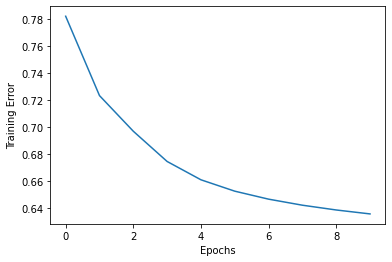

In [17]:
from keras.models import load_model

# if os.path.exists('regression_model.h5'):
#     model = load_model('regression_model.h5')
# else:
history = model.fit([Xtrain.book_id, Xtrain.user_id], Xtrain.rating, batch_size=64, epochs=10, verbose=1)
# model.save('regression_model.h5')
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Training Error")
# hist = model.fit([Xtrain.book_id, Xtrain.user_id], Xtrain.rating, batch_size=64, epochs=5, verbose=1)

# callbacks = [EarlyStopping('val_loss', patience=2), 
#              ModelCheckpoint('bestweights.h5', save_best_only=True)]

In [18]:
model.evaluate([Xtest.book_id, Xtest.user_id], Xtest.rating)

37353/37353 [==============================] - 50s 1ms/step - loss: 0.6835


0.6834740042686462

## Tune the Model

### Used RMSprop to optimze the model with a learning rate of 0.01
####MAE for loss

In [19]:
#Book input network
input_books = tf.layers.Input(shape=[1])
embed_books = tf.layers.Embedding(nbook_id+1, 5, name="Book-Embedding")(input_books)
books_vec = tf.layers.Flatten(name="Flatten-Books")(embed_books)

#user input network
input_users = tf.layers.Input(shape=[1])
embed_users = tf.layers.Embedding(nuser_id+1, 5, name="User-Embedding")(input_users)
users_vec = tf.layers.Flatten(name="Flatten-Users")(embed_users)

# concatenate features
conc_layer = tf.layers.Concatenate()([books_vec, users_vec])

# add fully-connected-layers
fc1 = Dense(128, activation='relu')(conc_layer)
fc2 = Dense(32, activation='relu')(fc1)
out = Dense(1)(fc2)

# Create model 
model2 = tf.Model([input_books, input_users], out)
# Optimizer
opt = tf.optimizers.RMSprop(learning_rate=0.01)
# compile model
model2.compile(optimizer=opt, loss='mean_absolute_error')

#####increased number of epochs to train the model more and created a batch_size of 128 in order to train faster cause it was taking long with 64

Epoch 1/20
37353/37353 [==============================] - 144s 4ms/step - loss: 0.6714
Epoch 2/20
37353/37353 [==============================] - 141s 4ms/step - loss: 0.6551
Epoch 3/20
37353/37353 [==============================] - 143s 4ms/step - loss: 0.6604
Epoch 4/20
37353/37353 [==============================] - 140s 4ms/step - loss: 0.6585
Epoch 5/20
37353/37353 [==============================] - 134s 4ms/step - loss: 0.6569
Epoch 6/20
37353/37353 [==============================] - 133s 4ms/step - loss: 0.6524
Epoch 7/20
37353/37353 [==============================] - 131s 4ms/step - loss: 0.6507
Epoch 8/20
37353/37353 [==============================] - 131s 4ms/step - loss: 0.6517
Epoch 9/20
37353/37353 [==============================] - 128s 3ms/step - loss: 0.6491
Epoch 10/20
37353/37353 [==============================] - 128s 3ms/step - loss: 0.6472
Epoch 11/20
37353/37353 [==============================] - 130s 3ms/step - loss: 0.6435
Epoch 12/20
37353/37353 [================

Text(0, 0.5, 'Training Error')

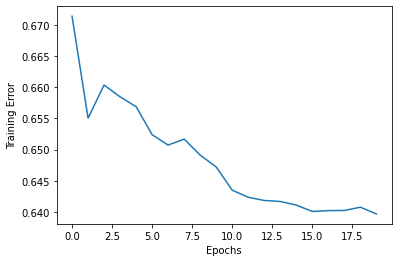

In [20]:
history2 = model2.fit([Xtrain.book_id, Xtrain.user_id], Xtrain.rating, batch_size=128, epochs=20, verbose=1)
plt.plot(history2.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Training Error")

####Evaluating the model

In [21]:
model2.evaluate([Xtest.book_id, Xtest.user_id], Xtest.rating)

37353/37353 [==============================] - 49s 1ms/step - loss: 0.6460


0.6459681987762451

### Used Adam to optimze the model with a learning rate of 0.001
####MAE for loss

In [22]:
#Book input network
input_books = tf.layers.Input(shape=[1])
embed_books = tf.layers.Embedding(nbook_id+1, 5, name="Book-Embedding")(input_books)
books_vec = tf.layers.Flatten(name="Flatten-Books")(embed_books)

#user input network
input_users = tf.layers.Input(shape=[1])
embed_users = tf.layers.Embedding(nuser_id+1, 5, name="User-Embedding")(input_users)
users_vec = tf.layers.Flatten(name="Flatten-Users")(embed_users)

# concatenate features
conc_layer = tf.layers.Concatenate()([books_vec, users_vec])

# add fully-connected-layers
fc1 = Dense(128, activation='relu')(conc_layer)
fc2 = Dense(32, activation='relu')(fc1)
out = Dense(1)(fc2)

# Create model 
model3 = tf.Model([input_books, input_users], out)
# Optimizer
opt = tf.optimizers.Adam(learning_rate=0.001)
# compile model
model3.compile(optimizer=opt,loss='mean_absolute_error')

Epoch 1/20
37353/37353 [==============================] - 173s 5ms/step - loss: 0.6640
Epoch 2/20
37353/37353 [==============================] - 179s 5ms/step - loss: 0.6276
Epoch 3/20
37353/37353 [==============================] - 172s 5ms/step - loss: 0.6185
Epoch 4/20
37353/37353 [==============================] - 168s 5ms/step - loss: 0.6114
Epoch 5/20
37353/37353 [==============================] - 167s 4ms/step - loss: 0.6060
Epoch 6/20
37353/37353 [==============================] - 166s 4ms/step - loss: 0.6023
Epoch 7/20
37353/37353 [==============================] - 167s 4ms/step - loss: 0.6018
Epoch 8/20
37353/37353 [==============================] - 166s 4ms/step - loss: 0.6026
Epoch 9/20
37353/37353 [==============================] - 167s 4ms/step - loss: 0.6045
Epoch 10/20
37353/37353 [==============================] - 170s 5ms/step - loss: 0.6058
Epoch 11/20
37353/37353 [==============================] - 172s 5ms/step - loss: 0.6038
Epoch 12/20
37353/37353 [================

Text(0, 0.5, 'Training Error')

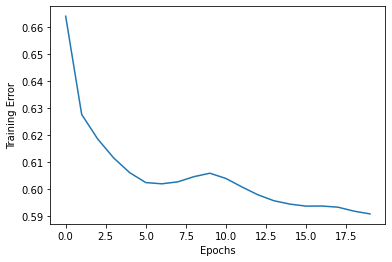

In [23]:
history3 = model3.fit([Xtrain.book_id, Xtrain.user_id], Xtrain.rating, batch_size=128, epochs=20, verbose=1)
plt.plot(history3.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Training Error")

In [24]:
model3.evaluate([Xtest.book_id, Xtest.user_id], Xtest.rating)

37353/37353 [==============================] - 53s 1ms/step - loss: 0.6217


0.6217340230941772

The results looks better than the previous models so I can either go with the previous or last model

####Let's keep the last model

In [60]:
model3.save('regression_model.h5')

In [26]:
# load all reviews
from keras.models import load_model
model = load_model( 'regression_model.h5' )

###Making Predictions

In [48]:
b_id =list(ratings_df.book_id.unique())
b_id.remove(10000)

In [51]:
len(b_id)

9999

In [52]:
book_arr = np.array(b_id)
user = np.array([53424 for i in range(len(b_id))])
pred = model.predict([book_arr, user])
pred

array([[4.914786 ],
       [4.0217495],
       [4.027112 ],
       ...,
       [4.5302076],
       [4.9272437],
       [4.2729416]], dtype=float32)

In [54]:
pred = pred.reshape(-1)
pred_ids = (-pred).argsort()[0:5]
pred_ids

array([1457, 8514, 2173, 2172, 4696])

In [55]:
ratings_df.user_id.nunique()

53424

In [56]:
books_df.iloc[pred_ids]

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
1457,1458,3388,3388,2771048,105,067976397X,9.780680e+12,Louis de Bernières,1994.0,Captain Corelli's Mandolin,Corelli's Mandolin,eng,3.95,57583,65596,2279,1734,4029,13185,23679,22969,https://images.gr-assets.com/books/1479680795m...,https://images.gr-assets.com/books/1479680795s...
8514,8515,7521400,7521400,9742847,11,307461181,9.780307e+12,Carol Burnett,2010.0,NaN,This Time Together: Laughter and Reflection,eng,4.05,10609,12334,1406,171,471,2474,4728,4490,https://images.gr-assets.com/books/1320390701m...,https://images.gr-assets.com/books/1320390701s...
2173,2174,2279,2279,1732395,23,671869205,9.780672e+12,David McCullough,1992.0,Truman,Truman,en-US,4.15,53088,54704,1767,1869,2168,7817,17033,25817,https://images.gr-assets.com/books/1364681969m...,https://images.gr-assets.com/books/1364681969s...
2172,2173,16141924,16141924,21973739,16,385349068,9.780385e+12,Jim Gaffigan,2013.0,Dad Is Fat,Dad Is Fat,NaN,3.76,40489,46767,6014,827,3199,13535,17973,11233,https://images.gr-assets.com/books/1354052742m...,https://images.gr-assets.com/books/1354052742s...
4696,4697,12758317,12758317,17893276,61,1451664125,9.781452e+12,John Irving,2012.0,In One Person,In One Person,NaN,3.65,18561,21588,3137,724,1843,6109,8396,4516,https://images.gr-assets.com/books/1379313446m...,https://images.gr-assets.com/books/1379313446s...


In [57]:
web_book_data = books_df[["book_id", "title", "image_url", "authors"]]
web_book_data = web_book_data.sort_values('book_id')

In [58]:
web_book_data.head()

,book_id,title,image_url,authors
0,1,"The Hunger Games (The Hunger Games, #1)",https://images.gr-assets.com/books/1447303603m...,Suzanne Collins
1,2,Harry Potter and the Sorcerer's Stone (Harry P...,https://images.gr-assets.com/books/1474154022m...,"J.K. Rowling, Mary GrandPré"
2,3,"Twilight (Twilight, #1)",https://images.gr-assets.com/books/1361039443m...,Stephenie Meyer
3,4,To Kill a Mockingbird,https://images.gr-assets.com/books/1361975680m...,Harper Lee
4,5,The Great Gatsby,https://images.gr-assets.com/books/1490528560m...,F. Scott Fitzgerald


In [59]:
web_book_data.to_json(r'web_book_data.json', orient='records')